# iQOO Z10 Augmented Data - Sentiment Analysis
Analyzing sentiment of augmented iQOO Z10 reviews dataset

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# =========================
# 1️⃣ LOAD AUGMENTED CSV
# =========================
df = pd.read_csv("../../augmented_data/iqoo_z10_augmented.csv")

print("✅ Augmented data loaded")
print(f"Total reviews: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
df.head()

✅ Augmented data loaded
Total reviews: 152
Columns: ['rating', 'title', 'review_text']

First 5 rows:


,rating,title,review_text
0,5,",093 ratings and 248 reviews","1 250 2 94 3 263 4 1,163 5 3,323 59 User revie..."
1,5,Classy product,Product is good and value fore maney and batte...
2,4,Worth the money,"Single speaker, its ok for normal vdo watching..."
3,4,Worth the money,"The product is very nice, really I Love this m..."
4,5,Great product,This is a nice phone . And its performance is ...


In [3]:
# =========================
# 2️⃣ DATA OVERVIEW
# =========================
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nRating Distribution:")
print(df['rating'].value_counts().sort_index())
print(f"\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
Shape: (152, 3)

Rating Distribution:
rating
1    11
2     7
3     3
4    33
5    98
Name: count, dtype: int64

Missing Values:
rating         0
title          0
review_text    0
dtype: int64


In [4]:
# =========================
# 3️⃣ SENTIMENT FUNCTIONS
# =========================
def get_polarity(text):
    """Calculate sentiment polarity using TextBlob"""
    if pd.isna(text):
        return 0.0
    return TextBlob(str(text)).sentiment.polarity

def get_subjectivity(text):
    """Calculate subjectivity using TextBlob"""
    if pd.isna(text):
        return 0.0
    return TextBlob(str(text)).sentiment.subjectivity

def get_sentiment(score):
    """Classify sentiment based on polarity"""
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

print("✅ Sentiment functions defined")

✅ Sentiment functions defined


In [5]:
# =========================
# 4️⃣ APPLY SENTIMENT ANALYSIS
# =========================
print("Analyzing sentiment... (this may take a minute)")

# Apply sentiment analysis on review text
df["polarity"] = df["review_text"].apply(get_polarity)
df["subjectivity"] = df["review_text"].apply(get_subjectivity)
df["sentiment"] = df["polarity"].apply(get_sentiment)

print("\n✅ Sentiment analysis completed!")
print(f"\nSentiment Distribution:")
print(df["sentiment"].value_counts())

# Show sample results
df[["rating", "review_text", "polarity", "sentiment"]].head(10)

Analyzing sentiment... (this may take a minute)

✅ Sentiment analysis completed!

Sentiment Distribution:
sentiment
Positive    137
Negative     15
Name: count, dtype: int64


,rating,review_text,polarity,sentiment
0,5,"1 250 2 94 3 263 4 1,163 5 3,323 59 User revie...",0.758333,Positive
1,5,Product is good and value fore maney and batte...,0.516667,Positive
2,4,"Single speaker, its ok for normal vdo watching...",0.354135,Positive
3,4,"The product is very nice, really I Love this m...",0.353750,Positive
4,5,This is a nice phone . And its performance is ...,0.533333,Positive
5,5,Nice phone at this price range Poli saanam REA...,0.550000,Positive
6,5,Display 4.5 design 4.4 camera 4.3 performance ...,0.500000,Positive
7,4,Mobile is good performance is very smooth Netw...,0.348182,Positive
8,5,Good phone at this price range. And amazing ba...,0.600000,Positive
9,5,Camera too good Performance so good Display ok...,0.633333,Positive


In [6]:
# =========================
# 5️⃣ STATISTICS
# =========================
print("Sentiment Statistics:")
print("="*50)
print(f"Average Polarity: {df['polarity'].mean():.3f}")
print(f"Average Subjectivity: {df['subjectivity'].mean():.3f}")
print(f"\nPolarity Range: {df['polarity'].min():.3f} to {df['polarity'].max():.3f}")
print(f"Subjectivity Range: {df['subjectivity'].min():.3f} to {df['subjectivity'].max():.3f}")

print("\n" + "="*50)
print("Sentiment by Rating:")
print(df.groupby('rating')['sentiment'].value_counts().unstack(fill_value=0))

Sentiment Statistics:
Average Polarity: 0.408
Average Subjectivity: 0.597

Polarity Range: -0.208 to 0.833
Subjectivity Range: 0.173 to 0.841

Sentiment by Rating:
sentiment  Negative  Positive
rating                       
1                 8         3
2                 2         5
3                 0         3
4                 0        33
5                 5        93


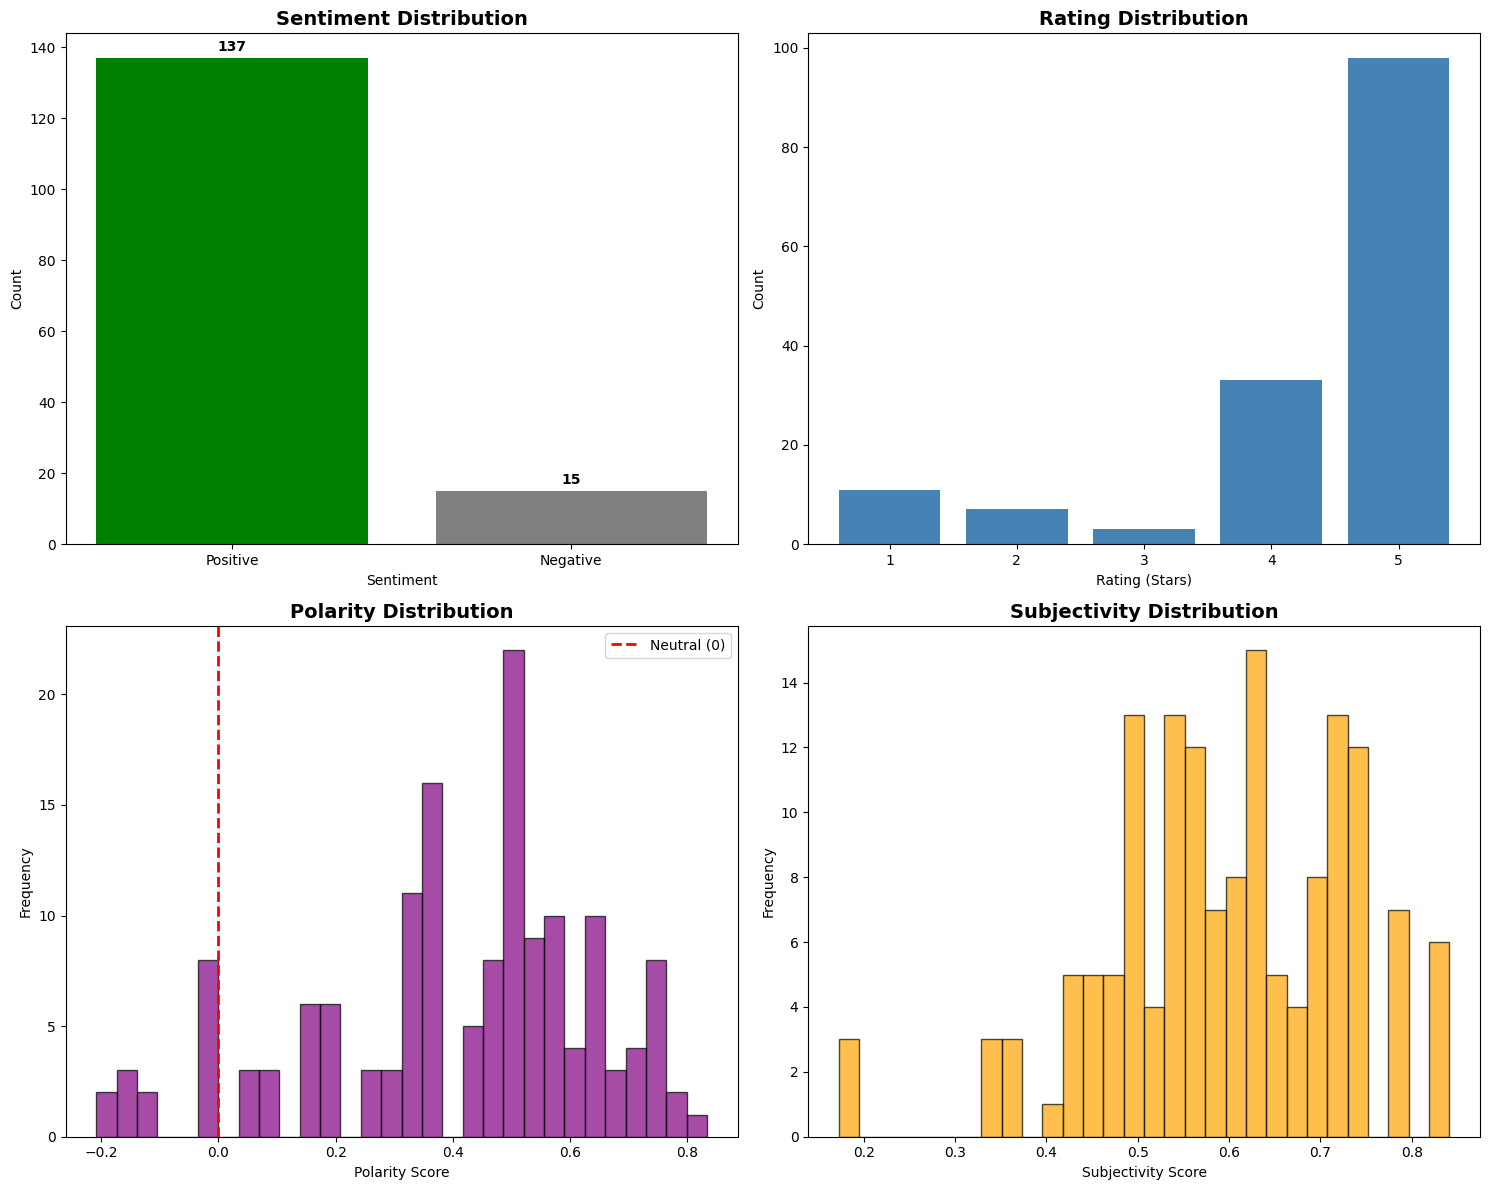

✅ Visualizations saved as 'iqoo_z10_augmented_sentiment_visualizations.png'


In [7]:
# =========================
# 6️⃣ VISUALIZATIONS
# =========================
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
axes[0, 0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Count')
for i, v in enumerate(sentiment_counts.values):
    axes[0, 0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Plot 2: Rating Distribution
rating_counts = df['rating'].value_counts().sort_index()
axes[0, 1].bar(rating_counts.index, rating_counts.values, color='steelblue')
axes[0, 1].set_title('Rating Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rating (Stars)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks([1, 2, 3, 4, 5])

# Plot 3: Polarity Distribution
axes[1, 0].hist(df['polarity'], bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Polarity Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Polarity Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Neutral (0)')
axes[1, 0].legend()

# Plot 4: Subjectivity Distribution
axes[1, 1].hist(df['subjectivity'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Subjectivity Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Subjectivity Score')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('iqoo_z10_augmented_sentiment_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualizations saved as 'iqoo_z10_augmented_sentiment_visualizations.png'")

<Figure size 1200x600 with 0 Axes>

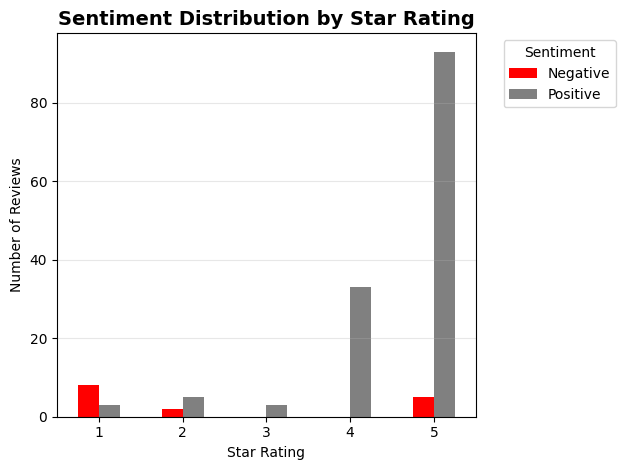

✅ Sentiment vs Rating chart saved


In [8]:
# =========================
# 7️⃣ SENTIMENT vs RATING COMPARISON
# =========================
plt.figure(figsize=(12, 6))

# Group by rating and sentiment
sentiment_by_rating = df.groupby(['rating', 'sentiment']).size().unstack(fill_value=0)
sentiment_by_rating.plot(kind='bar', stacked=False, color=['red', 'gray', 'green'])

plt.title('Sentiment Distribution by Star Rating', fontsize=14, fontweight='bold')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('iqoo_z10_augmented_sentiment_by_rating.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Sentiment vs Rating chart saved")

In [9]:
# =========================
# 8️⃣ SAVE RESULTS
# =========================
output_csv = "iqoo_z10_augmented_sentiment_analysis.csv"
output_excel = "iqoo_z10_augmented_sentiment_analysis.xlsx"

# Save to CSV
df.to_csv(output_csv, index=False)
print(f"✅ Results saved to: {output_csv}")

# Save to Excel
df.to_excel(output_excel, index=False, engine='openpyxl')
print(f"✅ Results saved to: {output_excel}")

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print(f"Total Reviews Analyzed: {len(df)}")
print(f"Positive: {(df['sentiment'] == 'Positive').sum()}")
print(f"Neutral: {(df['sentiment'] == 'Neutral').sum()}")
print(f"Negative: {(df['sentiment'] == 'Negative').sum()}")

✅ Results saved to: iqoo_z10_augmented_sentiment_analysis.csv
✅ Results saved to: iqoo_z10_augmented_sentiment_analysis.xlsx

ANALYSIS COMPLETE!
Total Reviews Analyzed: 152
Positive: 137
Neutral: 0
Negative: 15
